In [1]:
from sklearn.datasets import make_classification, make_biclusters, make_moons
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

In [2]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

In [3]:
X, y = make_moons()

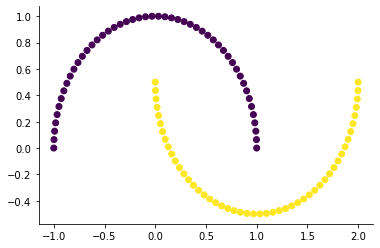

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
sns.despine()

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
lr = LogisticRegression(C=0.1)

In [7]:
lr.fit(X, y)

LogisticRegression(C=0.1)

In [8]:
lr.coef_

array([[ 0.77462686, -1.00249683]])

In [9]:
lr.intercept_

array([-0.13668932])

In [10]:
lr.predict_proba(X)[:, 1]

array([0.26840981, 0.75772914, 0.74813065, 0.27409293, 0.55110128,
       0.70627234, 0.25727664, 0.56897146, 0.47115787, 0.80147326,
       0.24227083, 0.5085943 , 0.54901695, 0.79688546, 0.80068185,
       0.80272993, 0.20869793, 0.52884207, 0.2066841 , 0.19787991,
       0.79960007, 0.23803206, 0.65428709, 0.79840778, 0.6608776 ,
       0.2624733 , 0.64391705, 0.21645901, 0.43102849, 0.41136739,
       0.60766335, 0.2047137 , 0.77011055, 0.24715512, 0.75284485,
       0.33912236, 0.20159219, 0.22988941, 0.29372762, 0.51157662,
       0.67695842, 0.23366188, 0.39364478, 0.48842333, 0.34571287,
       0.37385066, 0.76633809, 0.63925124, 0.21112566, 0.2135633 ,
       0.41143572, 0.28673058, 0.80212006, 0.79528627, 0.69210347,
       0.2031145 , 0.28056096, 0.58863256, 0.25186931, 0.19727003,
       0.62325365, 0.37674631, 0.72590703, 0.7619679 , 0.36074871,
       0.20039989, 0.32304153, 0.7888743 , 0.42982138, 0.19748525,
       0.80251472, 0.450983  , 0.58856423, 0.60635517, 0.21933

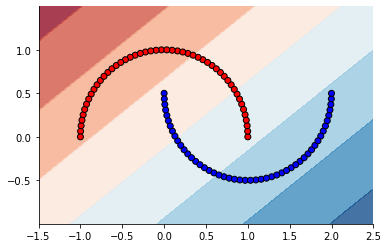

In [11]:
DecisionBoundaryDisplay.from_estimator(
    lr, X, cmap=cm, alpha=0.8, eps=0.5, grid_resolution=400
)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
sns.despine()

In [12]:
y_true = y
y_pred = lr.predict(X)

In [13]:
y_conf = lr.predict_proba(X)[:, 1]

In [14]:
# Put reliability_diagrams.py from https://github.com/hollance/reliability-diagrams in this folder
from reliability_diagrams import *

In [15]:
nbins = 10
res = compute_calibration(y_true, y_pred, y_conf, num_bins=nbins)
res

{'accuracies': array([0. , 1. , 1. , 0.6, 0.5, 0.5, 0.6, 1. , 1. , 0. ]),
 'confidences': array([0.        , 0.198096  , 0.2360224 , 0.35691832, 0.45029987,
        0.54970008, 0.64308163, 0.76397757, 0.80190396, 0.        ]),
 'counts': array([ 0,  5, 25, 10, 10, 10, 10, 25,  5,  0]),
 'bins': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'avg_accuracy': 0.82,
 'avg_confidence': 0.4999999796042566,
 'expected_calibration_error': 0.3385563620199922,
 'max_calibration_error': 0.8019039960944142}

In [16]:
y_conf.mean()

0.4999999796042567

In [17]:
(y_pred == y_true).mean()

0.82

In [18]:
y_conf[y_conf < 0.2].mean(), res["confidences"][1]

(0.1980960039055858, 0.1980960039055858)

Text(0, 0.5, 'Accuracy')

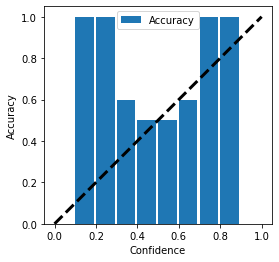

In [19]:
plt.gca().set_aspect("equal")
plt.bar(
    np.linspace(0, 1, nbins + 1)[:-1],
    res["accuracies"],
    width=1.0 / (nbins) - 0.01,
    align="edge",
    label="Accuracy",
)
plt.plot(
    np.linspace(0, 1, nbins + 1), np.linspace(0, 1, nbins + 1), color="k", ls="--", lw=3
)
plt.legend()
plt.xlabel("Confidence")
plt.ylabel("Accuracy")

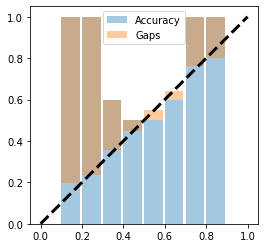

In [20]:
plt.gca().set_aspect("equal")
plt.bar(
    np.linspace(0, 1, nbins + 1)[:-1],
    res["accuracies"],
    width=1.0 / (nbins) - 0.01,
    align="edge",
    label="Accuracy",
    alpha=0.4,
)
gaps = res["accuracies"] - res["confidences"]

plt.bar(
    np.linspace(0, 1, nbins + 1)[:-1],
    gaps,
    width=1.0 / (nbins) - 0.01,
    align="edge",
    label="Gaps",
    alpha=0.4,
    bottom=res["confidences"],
)


plt.plot(
    np.linspace(0, 1, nbins + 1), np.linspace(0, 1, nbins + 1), color="k", ls="--", lw=3
)
plt.legend()

Text(0, 0.5, 'Counts')

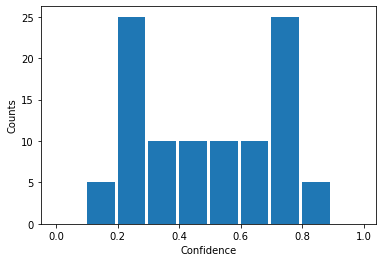

In [21]:
# plt.gca().set_aspect("equal")
plt.bar(
    np.linspace(0, 1, nbins + 1)[:-1],
    res["counts"],
    width=1.0 / (nbins) - 0.01,
    align="edge",
)
# plt.plot(np.linspace(0, 1, nbins+1), np.linspace(0, 1, nbins+1), color='k', ls = '--', lw = 3)
plt.xlabel("Confidence")
plt.ylabel("Counts")

In [22]:
gaps = res["accuracies"] - res["confidences"]
abs_gaps = np.abs(gaps)
weighted_abs_gaps = (res["counts"]/res["counts"].sum())*abs_gaps
ece = weighted_abs_gaps.sum()

print(ece, res['expected_calibration_error'])

0.3385563620199921 0.3385563620199922


In [23]:
abs_gaps.max(), res['max_calibration_error']

(0.8019039960944142, 0.8019039960944142)